In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1 - Clustering of countries based on the variants we find there.
# Step 1.1 - Reading the data
variantsData = pd.read_csv('input/variants.csv')
variantsData.head() # Useful to visualize data

,Unnamed: 0,Country,first_seq,num_seqs,last_seq,variant
0,0,China,2019-10-22,3,2020-06-03,S.Q677
1,1,USA,2020-03-03,26022,2021-11-19,S.Q677
2,2,Brazil,2020-03-09,1553,2021-11-12,S.Q677
3,3,Australia,2020-03-20,88,2021-11-14,S.Q677
4,4,Sweden,2020-03-20,810,2021-11-19,S.Q677


In [3]:
# Step 1.2 - Filtering Data to keep only : Variant name, Number of occurences, Country
variantsData = variantsData.loc[:, ['Country', 'num_seqs', 'variant']]
variantsData.head() # Useful to visualize data

,Country,num_seqs,variant
0,China,3,S.Q677
1,USA,26022,S.Q677
2,Brazil,1553,S.Q677
3,Australia,88,S.Q677
4,Sweden,810,S.Q677


In [4]:
# Step 1.3 - Adding data about countries
countriesData = pd.read_csv('input/countries.csv')
countriesData.head()
# Removes leading and trailing spaces in country name
countriesData['Country'] = countriesData['Country'].str.lstrip()
countriesData['Country'] = countriesData['Country'].str.rstrip()
dataFrame = variantsData.merge(countriesData, on='Country')
dataFrame.head() # Useful for data visualization

,Country,num_seqs,variant,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,China,3,S.Q677,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
1,China,23,S.N501,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
2,China,7,S.L18,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
3,China,1,S.Y453F,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
4,China,41,21A.Delta,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"


In [5]:
# Step 1.4 - Grouping in a list by variant name 
groupedByVariant = []
for name, subdf in dataFrame.groupby('variant'):
    subdf['Country_id'] = pd.factorize(subdf.Country)[0] + 1
    groupedByVariant.append(subdf[subdf['num_seqs'] > 15])

Sortie de l'algo après avoir redéfini 1 fois les centres


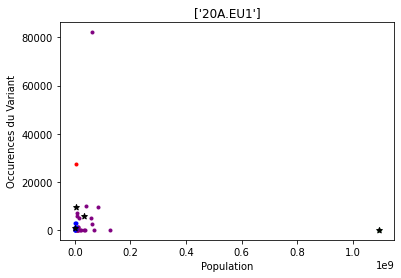

Sortie de l'algo après avoir redéfini 1 fois les centres


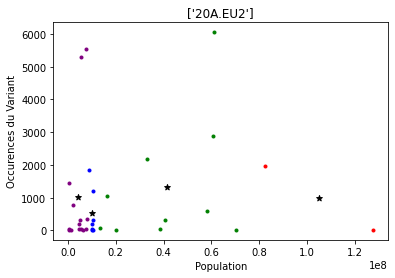

/home/yanis/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yanis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
from kmeans import kmeans, draw_clusters
k = 4
for variantDF in groupedByVariant:
    X = variantDF[['Population', 'num_seqs']].values
    clusters, centroids = kmeans(X, k, 10)
    draw_clusters(X, clusters, centroids, variantDF.variant.unique(), 'Population', 'Occurences du Variant')